In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install --no-deps fastbook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 11.0 MB/s eta 0:00:00


In [3]:
!pip install -q ddgs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 51.3 MB/s eta 0:00:00


In [4]:
from ddgs import DDGS
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *
from fastai.vision.all import Image

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    with DDGS() as ddgs:
        results = ddgs.images(term, max_results=max_images)
        return [r["image"] for r in results]

/usr/local/lib/python3.12/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` 

Searching for 'bullish pattern'


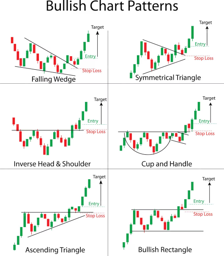

In [5]:
download_url(search_images('bullish pattern', max_images=1)[0], 'bullish.jpg', show_progress=False)
Image.open('bullish.jpg').to_thumb(256,256)

Searching for 'bearish pattern'


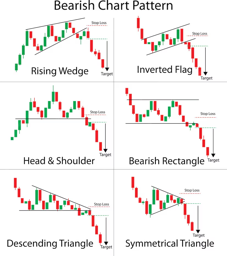

In [6]:
download_url(search_images('bearish pattern', max_images=1)[0], 'bearish.jpg', show_progress=False)
Image.open('bearish.jpg').to_thumb(256,256)

In [7]:
searches = 'bullish','bearish'
path = Path('cat_or_dog')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} pattern'))
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'bullish pattern'
Searching for 'bearish pattern'


In [8]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

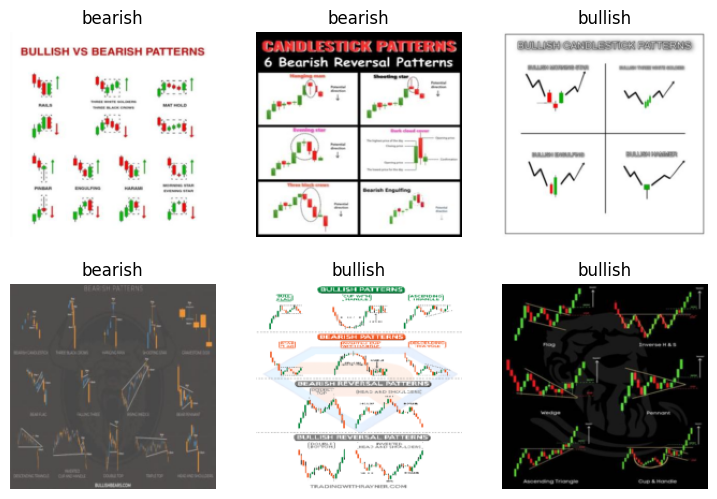

In [9]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [10]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 187MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.641157,3.395640,0.363636,00:01


epoch,train_loss,valid_loss,error_rate,time
0,1.688648,2.776394,0.363636,00:00
1,1.563561,2.456669,0.363636,00:00
2,1.229820,2.072438,0.363636,00:00


This is a: bearish pattern.
Probability it's a bullish pattern: 0.9903
Probability it's a bearish pattern: 0.0097


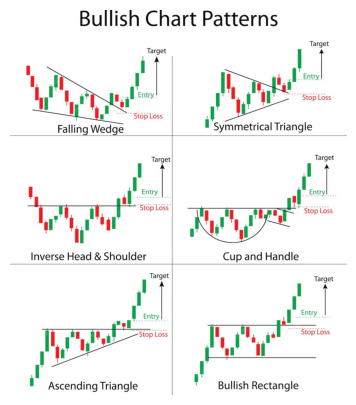

In [11]:
sample_photo = PILImage.create('bullish.jpg')
sample_photo.show()
pattern_type,_,probs = learn.predict(sample_photo)

print(f"This is a: {pattern_type} pattern.")
print(f"Probability it's a bullish pattern: {probs[0]:.4f}")
print(f"Probability it's a bearish pattern: {probs[1]:.4f}")

This is a: bearish pattern.
Probability it's a bullish pattern: 0.9990
Probability it's a bearish pattern: 0.0010


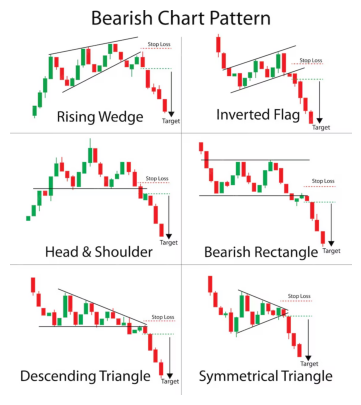

In [12]:
sample_photo = PILImage.create('bearish.jpg')
sample_photo.show()
pattern_type,_,probs = learn.predict(sample_photo)

print(f"This is a: {pattern_type} pattern.")
print(f"Probability it's a bullish pattern: {probs[0]:.4f}")
print(f"Probability it's a bearish pattern: {probs[1]:.4f}")